In [5]:
# ========================= Variabel ====================================

# df_cov                = data covid 19
# df_faskes19           = data faskes 2019
# df_faskes20           = data faskes 2020
# df_faskes21           = data faskes 2021
# df_faskes22           = data faskes 2022
# growth_deaths         = Pertumbuhan kematian 
# growth_deaths_normal  = Pertumbuhan kematian dengan normalisasi
# avg_deaths            = Rata-rata Pertumbuhan kematian
# avg_deaths_normal     = Rata-rata Pertumbuhan kematian dengan normalisasi  
# ----Merge--------
# df_death_faskes       = Data Gabungan jumlah kematian Covid-19 | total faskes | avg_deaths 
# df_death_faskes_norm  = Data Gabungan jumlah kematian Covid-19 | total faskes | avg_deaths_normal 


#### Library

In [6]:
# Import Library

from tkinter.ttk import Separator
from sys import displayhook
import pandas as pd
import numpy as np
from numpy import int64
from numpy import corrcoef
# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
# ML
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy.stats import pearsonr

#### Function

In [7]:
def get_all_cols(df):
    all_col = list(df.columns)
    return all_col

def get_cat_cols(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def get_num_cols(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='int32'])+list(df.columns[df.dtypes=='float64'])
    return cat

def get_head(df, n=3):
  print(f'Shape : {df.shape}')
  displayhook(df.head(n=n))

def check_missing(df, percentage=0):
    percent=df.isnull().sum()/df.shape[0]*100
    freq=df.isnull().sum()
    types=df.dtypes
    df_miss=pd.DataFrame({'percentage':percent, 'frequency':freq, 'var_type':types})
    df_miss.sort_values(by='frequency',ascending= False, inplace=True)
    return df_miss[df_miss['percentage']>percentage]

def getcorr(faskes, avg_growth_new_deaths):
    corr = round(pearsonr(df_death_faskes[faskes], df_death_faskes[avg_growth_new_deaths])[0], 4)
    return corr

def getpvalue(faskes, avg_growth_new_deaths):
    pvalue = round(pearsonr(df_death_faskes[faskes], df_death_faskes[avg_growth_new_deaths])[1], 4)
    return pvalue

### **Data Preparation**

In [8]:
# Load Data

# From Binar
# Covid 19
df_cov      = pd.read_csv('dataset_0/covid_19_indonesia_time_series_all (clean).csv')
# Faskes 19
df_faskes19   = pd.read_csv('dataset_0/Data_Faskes_BPJS_2019_clean.csv')

# 
# Faskes 2020
df_faskes20   = pd.read_csv('dataset_0/jumlah-faskes-per-provinsi-2020.csv', sep=';')
# Faskes 2021
df_faskes21   = pd.read_csv('dataset_0/jumlah-faskes-per-provinsi-2021.csv', sep=';')
# BPJS Faskes 2022
df_faskes22   = pd.read_csv('dataset_0/jumlah-faskes-per-provinsi.csv')

COVID-19

In [9]:
get_head(df_cov, n=10)

Shape : (31822, 23)


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Country,Island,Area (km2),Population,Longitude,Latitude,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,Indonesia,Jawa,664,10846145,106.836118,-6.204699,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,Indonesia,Jawa,664,10846145,106.836118,-6.204699,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,Indonesia,NaN,1916907,265185520,113.921327,-0.789275,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,Indonesia,Sumatera,87024,6074100,101.805109,0.511648,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,Indonesia,Jawa,664,10846145,106.836118,-6.204699,46.51%,174.42%,1.0,1.0
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,Indonesia,NaN,1916907,265185520,113.921327,-0.789275,0.00%,0.00%,0.0,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,60,...,Indonesia,Jawa,35378,45161325,107.603708,-6.920432,100.00%,6000.00%,NaN,NaN
7,3/3/2020,ID-RI,Riau,0,0,0,0,1,0,1,...,Indonesia,Sumatera,87024,6074100,101.805109,0.511648,0.00%,100.00%,0.0,1.0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,75,...,Indonesia,Jawa,664,10846145,106.836118,-6.204699,44.44%,166.67%,1.0,1.0
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,Indonesia,NaN,1916907,265185520,113.921327,-0.789275,0.00%,0.00%,1.0,1.0


In [10]:
location = df_cov['Location'].nunique()
print('Location\t\t:', location)

iso_code = df_cov['Location ISO Code'].nunique()
print('Location ISO Code\t:',iso_code)

province = df_cov['Province'].nunique()
print('Provinsi\t\t:', province)

Location		: 35
Location ISO Code	: 35
Provinsi		: 34


In [11]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  Province                     30893 non-null  object 
 13  Country         

In [12]:
df_cov.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Area (km2),Population,Longitude,Latitude,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,3.182200e+04,3.182200e+04,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,1.106532e+05,1.536766e+07,113.700478,-2.725681,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,3.187865e+05,4.461714e+07,9.862068,3.608065,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,6.640000e+02,6.484070e+05,96.910522,-8.682205,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,1.678700e+04,1.999539e+06,106.109004,-6.204699,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,4.201300e+04,4.216171e+06,113.417654,-2.461746,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,7.546800e+04,9.095591e+06,121.201093,0.212037,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,1.916907e+06,2.651855e+08,138.696030,4.225615,175.000000,134.500000


Faskes 2019

In [13]:
get_head(df_faskes19, n=5)

Shape : (29157, 9)


,Provinsi,KotaKab,Link,TipeFaskes,KodeFaskes,NamaFaskes,LatLongFaskes,AlamatFaskes,TelpFaskes
0,Nanggroe Aceh Darussalam,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,0001R001,RSU Cut Nyak Dhien,"http://maps.google.co.id/?q=4.488058,97.947963",Jl. Tm Bahrum No. 1 Langsa,0641-0621039
1,Nanggroe Aceh Darussalam,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,0001R004,RSU Cut Meutia Langsa,"http://maps.google.co.id/?q=4.488088,97.947781",Jl.Garuda Kebun Baru Langsa,0641- 4840076
2,Nanggroe Aceh Darussalam,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,0105R001,RSUD Langsa,"http://maps.google.co.id/?q=4.472208,97.975533",Jln.A.Yani No. 1 Langsa,0641-22051
3,Nanggroe Aceh Darussalam,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,0105R013,RSU Ummi,"http://maps.google.co.id/?q=4.470376,97.991915",Jln. Prof. A. Madjid Ibrahim,0641-22886
4,Nanggroe Aceh Darussalam,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Puskesmas,00010001,Langsa Lama,"http://maps.google.co.id/?q=4.478172,97.949988",Gampong Meurandeh Dayah,0641-064121218


Faskes 2020

In [14]:
get_head(df_faskes20, n=5)

Shape : (35, 8)


,Provinsi,Rumah sakit,Puskesmas,Dokter Praktik Perorangan,Dokter Gigi,Klink Utama,Klink Pratama,Apotek
0,Aceh,70.0,359.0,78.0,3.0,4.0,117.0,492.0
1,Sumatera Utara,222.0,608.0,125.0,8.0,74.0,1491.0,1431.0
2,Sumatera Barat,79.0,276.0,108.0,33.0,19.0,225.0,571.0
3,Riau,73.0,231.0,81.0,19.0,16.0,160.0,771.0
4,Jambi,42.0,207.0,71.0,17.0,10.0,157.0,418.0


In [15]:
# fas20 = df_faskes20['Provinsi'].unique().tolist()
# fas20

Faskes 2021

In [16]:
get_head(df_faskes21, n=5)

Shape : (34, 8)


,Provinsi,Rumah Sakit,Puskesmas,Dokter Praktik Perorangan,Dokter Gigi,Klinik Utama,Klinik Pratama,Apotek
0,Aceh,72,360.0,78,4,29,193,492
1,Sumatera Utara,222,615.0,128,8,14,213,1431
2,Sumatera Barat,80,279.0,107,37,19,132,571
3,Riau,76,234.0,74,18,6,100,771
4,Jambi,41,207.0,68,19,2,73,418


In [17]:
# fas21 = df_faskes21['Provinsi'].unique().tolist()
# fas21

Faskes 2022

In [18]:
get_head(df_faskes22, n=5)

Shape : (35, 8)


,Province,Rumah sakit,Puskesmas,Dokter Praktik Perorangan,Dokter Gigi,Klink Utama,Klink Pratama,Apotek
0,NANGGROE ACEH DARUSSALAM,119,554,214,13,48,277,206
1,SUMATERA UTARA,350,763,460,39,99,802,363
2,SUMATERA BARAT,147,363,424,74,89,208,228
3,RIAU,123,326,250,46,19,416,173
4,JAMBI,83,287,262,32,41,122,116


In [19]:
# ('dataset/Data_Faskes_BPJS_2019_clean.csv')
# Show number unique faskes from dataset 

print('Total Provinsi \t\t=', df_faskes19['Provinsi'].nunique())
print('Total tipe faskes \t=', df_faskes19['TipeFaskes'].nunique())
print('Tipe faskes \t\t=',df_faskes19['TipeFaskes'].unique().tolist())
print('Total Faskes \t\t=', df_faskes19['KodeFaskes'].nunique())

Total Provinsi 		= 34
Total tipe faskes 	= 7
Tipe faskes 		= ['Rumah Sakit', 'Puskesmas', 'Dokter Praktik Perorangan', 'Dokter Gigi', 'Klinik Utama', 'Klinik Pratama', 'Apotek']
Total Faskes 		= 28322


In [20]:
# Change Case Fatality Rate and Case Recovered Rate data type

df_cov['Case Fatality Rate'] = df_cov['Case Fatality Rate'].str.replace("%","").astype(float)
df_cov['Case Recovered Rate'] = df_cov['Case Recovered Rate'].str.replace("%","").astype(float)

# Changing Date Type
df_cov["Date"] = pd.to_datetime(df_cov['Date'])
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

In [21]:
# Change column name
for col in get_all_cols(df_cov):
    # df_cov[col] = df_cov[col].str.replace("%","", axis=1)
    df_cov.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         31822 non-null  datetime64[ns]
 1   location_iso_code            31822 non-null  object        
 2   location                     31822 non-null  object        
 3   new_cases                    31822 non-null  int64         
 4   new_deaths                   31822 non-null  int64         
 5   new_recovered                31822 non-null  int64         
 6   new_active_cases             31822 non-null  int64         
 7   total_cases                  31822 non-null  int64         
 8   total_deaths                 31822 non-null  int64         
 9   total_recovered              31822 non-null  int64         
 10  total_active_cases           31822 non-null  int64         
 11  location_level               31822 non-nu

In [22]:
# Show data starts and ends from COVID-19

print('Date starts\t:', df_cov['date'].min())
print('Date ends\t:', df_cov['date'].max())

Date starts	: 2020-03-01 00:00:00
Date ends	: 2022-09-16 00:00:00


In [23]:
# Total cases in Indonesia
df_ind_total = df_cov.groupby('location_iso_code')['total_cases', 'total_recovered', 'total_deaths'].max().reset_index()  # type: ignore
df_ind_total = df_ind_total[df_ind_total['location_iso_code'] == 'IDN']
get_head(df_ind_total)

Shape : (1, 4)


C:\Users\Acer\AppData\Local\Temp\ipykernel_9236\4141090627.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ind_total = df_cov.groupby('location_iso_code')['total_cases', 'total_recovered', 'total_deaths'].max().reset_index()  # type: ignore


,location_iso_code,total_cases,total_recovered,total_deaths
34,IDN,6405044,6218708,157876


In [24]:
# Dataframe for merge with faskes
df_prov_deaths = df_cov.groupby(['province'])['total_deaths'].max().reset_index() #. sort_values(['total_cases'], ascending=False)
# df_prov_deaths = df_prov_deaths[df_cov['location_iso_code'] != 'IDN']
get_head(df_prov_deaths, n=35)

Shape : (34, 2)


,province,total_deaths
0,Aceh,2223
1,Bali,4731
2,Banten,2950
3,Bengkulu,522
4,DKI Jakarta,15513
5,Daerah Istimewa Yogyakarta,5928
6,Gorontalo,487
7,Jambi,889
8,Jawa Barat,15937
9,Jawa Tengah,33489


In [25]:
# Show data where location iso code IND (all province)
# Can make plot or graph time series use this dataframe

df_ind = df_cov[['date','total_cases', 'total_recovered', 'total_deaths']]
df_ind = df_ind[df_cov['location_iso_code'] == 'IDN']
get_head(df_ind, n=5)
# =================================================================================

Shape : (929, 4)


,date,total_cases,total_recovered,total_deaths
2,2020-03-02,2,0,0
5,2020-03-03,2,0,0
9,2020-03-04,2,0,0
13,2020-03-05,2,0,0
18,2020-03-06,4,0,0


In [26]:
# Show data based province
# Can make plot or graph use this dataframe province

# df_prov = df_cov.groupby(['location_iso_code','province'])[['total_cases', 'total_recovered', 'total_deaths']]. max(). reset_index() #. sort_values(['total_cases'], ascending=False)
df_prov = df_cov.groupby(['location_iso_code'])[['total_cases', 'total_recovered', 'total_deaths']]. max(). reset_index() #. sort_values(['total_cases'], ascending=False)
df_prov = df_prov[df_cov['location_iso_code'] != 'IDN']
get_head(df_prov)

Shape : (27, 4)


C:\Users\Acer\AppData\Local\Temp\ipykernel_9236\2906884680.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_prov = df_prov[df_cov['location_iso_code'] != 'IDN']


,location_iso_code,total_cases,total_recovered,total_deaths
0,ID-AC,44038,41713,2223
1,ID-BA,166831,161629,4731
3,ID-BE,29173,28617,522


##### Visualization

**COVID-19 IN INDONESIAN**

In [27]:

# Grouping cases by date 
temp = df_cov.groupby('date')['total_cases','total_recovered','total_deaths', 'location_iso_code'].max().reset_index()   # type: ignore
temp = temp[temp['location_iso_code'] == 'IDN']

# Unpivoting 
temp = temp.melt(id_vars='date',value_vars = ['total_deaths','total_cases','total_recovered'], var_name='Cases:', value_name='Count') 

# Visualization
fig = px.line(temp, x='date', y='Count', color='Cases:', template='ggplot2') 
fig.update_layout(title="COVID-19 Cases in Indonesia")
fig.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9236\3228711746.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = df_cov.groupby('date')['total_cases','total_recovered','total_deaths', 'location_iso_code'].max().reset_index()   # type: ignore


In [28]:
# Grouping cases by date 
temp_deaths = df_cov.groupby('date')['total_deaths', 'location_iso_code'].max().reset_index()    # type: ignore
temp_deaths = temp_deaths[temp_deaths['location_iso_code'] == 'IDN']

# Unpivoting 
temp_deaths = temp_deaths.melt(id_vars='date',value_vars = ['total_deaths'], var_name='Cases:', value_name='Count') 

# Visualization
fig = px.line(temp_deaths, x='date', y='Count', color='Cases:', template='ggplot2') 
fig.update_layout(title="COVID-19 Cases Deaths in Indonesia")
fig.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9236\67662349.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**NEW CASES COVID-19 IN INDONESIAN (Daily)**

In [29]:
# Grouping cases by date 
temp = df_cov.groupby('date')['new_cases','new_recovered','new_deaths', 'location_iso_code'].max().reset_index()  # type: ignore
temp = temp[temp['location_iso_code'] == 'IDN']

# Unpivoting 
temp = temp.melt(id_vars='date',value_vars = ['new_deaths','new_cases','new_recovered'], var_name='Case', value_name='Count') 

# Visualization
fig = px.line(temp, x='date', y='Count', color='Case', template='ggplot2') 
fig.update_layout(title="COVID-19 Progress in Indonesia")
fig.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9236\1900144082.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### **DATA PREPOCESSING**

#### COVID-19

In [30]:
check_missing(df_cov, percentage=0)

,percentage,frequency,var_type
growth_factor_of_new_deaths,10.832129,3447,float64
growth_factor_of_new_cases,6.093269,1939,float64
province,2.919364,929,object
island,2.919364,929,object


##### New Death, Total Deaths within Population

In [31]:
df_use = df_cov[['date', 'province','new_deaths', 'total_deaths', 'population', 'case_fatality_rate', 'growth_factor_of_new_deaths']]

# Get only province not na
df_use = df_use[df_use['province'].notna()]
get_head(df_use)

# make some column 
df_use['new_deaths_per_million']    = df_use['new_deaths'] / df_use['population'] * 1000000
df_use['total_deaths_per_milion']   = df_use['total_deaths'] / df_use['population'] * 1000000
df_use['total_deaths_per_100rb']    = df_use['total_deaths'] / df_use['population'] * 100000


Shape : (30893, 7)


,date,province,new_deaths,total_deaths,population,case_fatality_rate,growth_factor_of_new_deaths
0,2020-03-01,DKI Jakarta,0,20,10846145,51.28,NaN
1,2020-03-02,DKI Jakarta,0,20,10846145,48.78,1.0
3,2020-03-02,Riau,0,0,6074100,0.00,NaN


In [32]:
# Count data with same value province
province = df_use['province'].tolist()
prov = {}
for i in province:
    prov[i] = province.count(i)
print(prov)

{'DKI Jakarta': 929, 'Riau': 928, 'Jawa Barat': 927, 'Banten': 924, 'Jawa Tengah': 922, 'Sulawesi Tenggara': 920, 'Bali': 919, 'Kalimantan Timur': 916, 'Daerah Istimewa Yogyakarta': 914, 'Sumatera Utara': 913, 'Jawa Timur': 912, 'Kepulauan Riau': 911, 'Sulawesi Selatan': 911, 'Jambi': 910, 'Maluku': 908, 'Papua': 908, 'Maluku Utara': 907, 'Sumatera Selatan': 907, 'Aceh': 904, 'Kalimantan Tengah': 904, 'Lampung': 904, 'Sulawesi Tengah': 904, 'Sulawesi Utara': 904, 'Sumatera Barat': 904, 'Papua Barat': 903, 'Kalimantan Utara': 902, 'Sulawesi Barat': 901, 'Kalimantan Barat': 901, 'Kalimantan Selatan': 900, 'Kepulauan Bangka Belitung': 900, 'Bengkulu': 899, 'Nusa Tenggara Barat': 899, 'Nusa Tenggara Timur': 890, 'Gorontalo': 888}


In [33]:
# filter
# df_use = df_use[df_use['province'] == 'Jawa Tengah']
# df_use = df_use[df_use['date'] == '2021-01-13']
# get_head(df_use)

In [34]:
# df_use.groupby(['province'])['total_deaths_per_milion'].max().reset_index().head(5)

In [35]:
get_head(df_use)

Shape : (30893, 10)


,date,province,new_deaths,total_deaths,population,case_fatality_rate,growth_factor_of_new_deaths,new_deaths_per_million,total_deaths_per_milion,total_deaths_per_100rb
0,2020-03-01,DKI Jakarta,0,20,10846145,51.28,NaN,0.0,1.843973,0.184397
1,2020-03-02,DKI Jakarta,0,20,10846145,48.78,1.0,0.0,1.843973,0.184397
3,2020-03-02,Riau,0,0,6074100,0.00,NaN,0.0,0.000000,0.000000


total_deaths_per_milion

In [36]:
# # tdpm = df_use.set_index('date').groupby('province')['total_deaths'].resample("Y").max().reset_index()
# tdpm = df_use.groupby('province')
# # tdpm = tdpm.groupby(df_use['date'].dt.year).tail(1)
# # tdpm = pd.DataFrame(tdpm)
# tdpm

In [37]:
prov_d_m = df_use.sort_values('date', ascending= False)
prov_d_m = prov_d_m[prov_d_m['province'] == 'Jawa Tengah']
prov_d_m[['date', 'province', 'new_deaths_per_million','total_deaths_per_milion']]

,date,province,new_deaths_per_million,total_deaths_per_milion
31797,2022-09-15,Jawa Tengah,0.000000,920.936467
31763,2022-09-14,Jawa Tengah,0.054999,920.936467
31728,2022-09-13,Jawa Tengah,0.000000,920.881468
31693,2022-09-12,Jawa Tengah,0.054999,920.881468
31658,2022-09-11,Jawa Tengah,0.054999,920.826468
...,...,...,...,...
58,2020-03-12,Jawa Tengah,0.000000,0.302496
50,2020-03-11,Jawa Tengah,0.027500,0.302496
42,2020-03-10,Jawa Tengah,0.000000,0.274997
36,2020-03-09,Jawa Tengah,0.000000,0.274997


In [38]:
prov_d_m = df_use.groupby('province')[['total_deaths_per_milion']].mean().sort_values('total_deaths_per_milion', ascending= False)
prov_d_m

,total_deaths_per_milion
province,
Kalimantan Timur,812.834946
DKI Jakarta,761.482104
Daerah Istimewa Yogyakarta,748.722174
Kalimantan Utara,629.507984
Kepulauan Bangka Belitung,526.225724
Bali,520.652496
Kepulauan Riau,466.230153
Jawa Tengah,446.557367
Jawa Timur,416.727838


new_deaths_per_million

In [39]:
df_use[['province', 'new_deaths_per_million']].sort_values('new_deaths_per_million', ascending= False)

,province,new_deaths_per_million
7744,Bali,63.801966
17769,Kalimantan Utara,40.098272
17382,Kalimantan Tengah,39.295192
11187,Kalimantan Tengah,36.960824
17734,Kalimantan Utara,35.471548
...,...,...
12585,Kalimantan Barat,0.000000
12581,Jambi,0.000000
12579,Gorontalo,0.000000
12576,Bengkulu,0.000000


In [40]:
prov_nd_m = df_use.groupby('province')[['new_deaths_per_million']].mean().sort_values('new_deaths_per_million', ascending= False)
prov_nd_m

,new_deaths_per_million
province,
Daerah Istimewa Yogyakarta,1.786216
Kalimantan Timur,1.759785
DKI Jakarta,1.537604
Kalimantan Utara,1.470430
Kepulauan Bangka Belitung,1.301347
Bali,1.221010
Kepulauan Riau,1.074141
Jawa Tengah,0.998578
Jawa Timur,0.859553


##### Total Deaths Province

In [41]:
df_prov_deaths = df_prov_deaths.set_index('province')

get_head(df_prov_deaths, n=35)

Shape : (34, 1)


,total_deaths
province,
Aceh,2223
Bali,4731
Banten,2950
Bengkulu,522
DKI Jakarta,15513
Daerah Istimewa Yogyakarta,5928
Gorontalo,487
Jambi,889
Jawa Barat,15937


In [42]:
df_province_deaths = df_prov_deaths.sort_values('total_deaths', ascending=False)
df_province_deaths

,total_deaths
province,
Jawa Tengah,33489
Jawa Timur,31764
Jawa Barat,15937
DKI Jakarta,15513
Daerah Istimewa Yogyakarta,5928
Kalimantan Timur,5726
Bali,4731
Riau,4452
Lampung,4186


##### Growth of new Deaths

In [43]:
# get only columns 'date', 'province','new_deaths'
growth_deaths = df_cov[['date', 'province','new_deaths']]
# sum based month
growth_deaths = growth_deaths.set_index('date').groupby('province')["new_deaths"].resample("M").sum().reset_index()

# new_deaths_log 
# growth_deaths['total_new_deaths_lag'] = growth_deaths.groupby('province')["new_deaths"].shift(periods=1)

# kolom pertumbuhan kematian baru
# growth_deaths['growth_new_deaths'] = (growth_deaths['new_deaths'] - growth_deaths['total_new_deaths_lag']) / growth_deaths['total_new_deaths_lag']*100
growth_deaths['growth_new_deaths'] = growth_deaths['new_deaths'].pct_change()

# handling infinite, nan value
growth_deaths.replace([np.inf, -np.inf], 0, inplace=True)
growth_deaths.fillna(0, inplace=True)
# growth_deaths = growth_deaths[growth_deaths['growth_new_deaths'] > 0]

# rename sum new_deaths (bulan) as total_new_deaths (3 years)
growth_deaths.rename(columns={'new_deaths':'total_new_deaths'}, inplace=True)

# filter
# growth_deaths = growth_deaths[growth_deaths['province'] == 'Aceh']
growth_deaths_2020 = growth_deaths[growth_deaths['date'].dt.year == 2020]
growth_deaths_2021 = growth_deaths[growth_deaths['date'].dt.year == 2021]
growth_deaths_2022 = growth_deaths[growth_deaths['date'].dt.year == 2022]

growth_deaths_2020_2021 = growth_deaths[growth_deaths['date'].dt.year <= 2021]
growth_deaths_2021_2022 = growth_deaths[growth_deaths['date'].dt.year >= 2021]

get_head(growth_deaths, n=35)

Shape : (1052, 4)


,province,date,total_new_deaths,growth_new_deaths
0,Aceh,2020-03-31,0,0.000000
1,Aceh,2020-04-30,1,0.000000
2,Aceh,2020-05-31,0,-1.000000
3,Aceh,2020-06-30,2,0.000000
4,Aceh,2020-07-31,10,4.000000
5,Aceh,2020-08-31,47,3.700000
6,Aceh,2020-09-30,121,1.574468
7,Aceh,2020-10-31,98,-0.190083
8,Aceh,2020-11-30,57,-0.418367
9,Aceh,2020-12-31,22,-0.614035


In [44]:
# Rata pertumbuhan 3 tahun

avg_deaths = pd.DataFrame()
avg_deaths['avg_growth_new_deaths_3y'] = growth_deaths.groupby('province')['growth_new_deaths'].mean()
avg_deaths['avg_growth_new_deaths_2020'] = growth_deaths_2020.groupby('province')['growth_new_deaths'].mean()
avg_deaths['avg_growth_new_deaths_2021'] = growth_deaths_2021.groupby('province')['growth_new_deaths'].mean()
avg_deaths['avg_growth_new_deaths_2022'] = growth_deaths_2022.groupby('province')['growth_new_deaths'].mean()

avg_deaths['avg_growth_new_deaths_2020_2021'] = growth_deaths_2020_2021.groupby('province')['growth_new_deaths'].mean()
avg_deaths['avg_growth_new_deaths_2021_2022'] = growth_deaths_2021_2022.groupby('province')['growth_new_deaths'].mean()
avg_deaths

,avg_growth_new_deaths_3y,avg_growth_new_deaths_2020,avg_growth_new_deaths_2021,avg_growth_new_deaths_2022,avg_growth_new_deaths_2020_2021,avg_growth_new_deaths_2021_2022
province,,,,,,
Aceh,1.033830,0.705198,0.385787,2.263034,0.530974,1.190321
Bali,1.671211,1.623836,0.724672,2.985901,1.133383,1.693770
Banten,0.670533,0.317744,0.484847,1.310103,0.408891,0.838528
Bengkulu,0.409066,0.940238,0.341508,-0.091049,0.613658,0.156126
DKI Jakarta,0.945270,0.337273,0.086220,2.766224,0.200335,1.234793
Daerah Istimewa Yogyakarta,0.673124,0.193345,0.225665,1.802824,0.210974,0.901590
Gorontalo,0.817675,0.858504,0.357825,1.389978,0.572402,0.800176
Jambi,0.792135,0.880128,0.277292,1.380820,0.551309,0.750233
Jawa Barat,1.531722,3.366611,0.148305,1.337512,1.611171,0.657965


##### Normalisasi Growth of new Deaths


In [45]:
num_col = get_num_cols(growth_deaths)
num_col

['total_new_deaths', 'growth_new_deaths']

In [46]:
scaler = MinMaxScaler()
X_transforme = scaler.fit_transform(growth_deaths[num_col]) 

# scaler = MinMaxScaler()
# X_transforme = scaler.fit_transform(growth_deaths[['growth_new_deaths']]) 

In [47]:
growth_deaths_norm = pd.DataFrame(X_transforme, columns = [num_col])
print(growth_deaths_norm.shape)
growth_deaths_norm.head()

(1052, 2)


,total_new_deaths,growth_new_deaths
0,0.000000,0.013889
1,0.000111,0.013889
2,0.000000,0.000000
3,0.000222,0.013889
4,0.001111,0.069444


In [48]:
growth_deaths = growth_deaths[['province', 'date']]

growth_deaths_normal = pd.concat([growth_deaths, growth_deaths_norm], axis=1)
growth_deaths_normal

,province,date,"(total_new_deaths,)","(growth_new_deaths,)"
0,Aceh,2020-03-31,0.000000,0.013889
1,Aceh,2020-04-30,0.000111,0.013889
2,Aceh,2020-05-31,0.000000,0.000000
3,Aceh,2020-06-30,0.000222,0.013889
4,Aceh,2020-07-31,0.001111,0.069444
...,...,...,...,...
1047,Sumatera Utara,2022-05-31,0.000555,0.002671
1048,Sumatera Utara,2022-06-30,0.000555,0.013889
1049,Sumatera Utara,2022-07-31,0.000555,0.013889
1050,Sumatera Utara,2022-08-31,0.001666,0.041667


In [49]:
growth_deaths_2020_2021 = growth_deaths_normal[growth_deaths_normal['date'].dt.year <= 2021]
growth_deaths_2021_2022 = growth_deaths_normal[growth_deaths_normal['date'].dt.year >= 2021]

In [50]:
# avg_deaths_norm = pd.DataFrame()
# avg_deaths_norm['growth_new_deaths_3y'] = growth_deaths_normal.groupby('province')['growth_new_deaths'].mean()
# avg_deaths_norm['growth_new_deaths_2020_2021'] = growth_deaths_2020_2021.groupby('province')['growth_new_deaths'].mean()
# avg_deaths_norm['growth_new_deaths_2021_2022'] = growth_deaths_2021_2022.groupby('province')['growth_new_deaths'].mean()
# avg_deaths_norm

#### FASKES

##### Faskes 2022

In [51]:
# Change column name
for col in get_all_cols(df_faskes22):
    # df_faskes22[col] = df_cov[col].str.replace("%","", axis=1)
    df_faskes22.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

df_faskes22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   province                   35 non-null     object
 1   rumah_sakit                35 non-null     int64 
 2   puskesmas                  35 non-null     int64 
 3   dokter_praktik_perorangan  35 non-null     int64 
 4   dokter_gigi                35 non-null     int64 
 5   klink_utama                35 non-null     int64 
 6   klink_pratama              35 non-null     int64 
 7   apotek                     35 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.3+ KB


In [52]:
check_missing(df_faskes22, percentage=0)

,percentage,frequency,var_type


In [53]:
# String to Title
df_faskes22['province'] = df_faskes22['province'].str.title()
get_head(df_faskes22)

Shape : (35, 8)


,province,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klink_utama,klink_pratama,apotek
0,Nanggroe Aceh Darussalam,119,554,214,13,48,277,206
1,Sumatera Utara,350,763,460,39,99,802,363
2,Sumatera Barat,147,363,424,74,89,208,228


In [54]:
df_faskes22['province'] = df_faskes22['province'].replace(
    ['Dki Jakarta', 'Kep. Bangka Belitung', 'Nanggroe Aceh Darussalam', 'D I  Yogyakarta'],
    ['DKI Jakarta', 'Kepulauan Bangka Belitung', 'Aceh', 'Daerah Istimewa Yogyakarta']
)

In [55]:
df_faskes22 = df_faskes22.set_index('province')

# Sum Row
df_faskes22['total_faskes_22'] = df_faskes22.sum(axis=1)
get_head(df_faskes22)

Shape : (35, 8)


,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klink_utama,klink_pratama,apotek,total_faskes_22
province,,,,,,,,
Aceh,119,554,214,13,48,277,206,1431
Sumatera Utara,350,763,460,39,99,802,363,2876
Sumatera Barat,147,363,424,74,89,208,228,1533


In [56]:
# Drop Luar Negeri
df_faskes22 = df_faskes22.drop(index=['Luar Negeri'])

# Sort province
df_faskes22.sort_index(inplace= True)

In [57]:
# # Export to File
# df_faskes22.to_csv('faskes_2022.csv')

##### Faskes 2021

In [58]:
# Change column name
for col in get_all_cols(df_faskes21):
    # df_faskes22[col] = df_cov[col].str.replace("%","", axis=1)
    df_faskes21.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

df_faskes21 = df_faskes21.rename(columns={'provinsi':'province'})
df_faskes21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   province                   34 non-null     object 
 1   rumah_sakit                34 non-null     int64  
 2   puskesmas                  34 non-null     float64
 3   dokter_praktik_perorangan  34 non-null     int64  
 4   dokter_gigi                34 non-null     int64  
 5   klinik_utama               34 non-null     int64  
 6   klinik_pratama             34 non-null     int64  
 7   apotek                     34 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.2+ KB


In [59]:
check_missing(df_faskes21, percentage=0)

,percentage,frequency,var_type


In [60]:
# from jupyterlab_server import translator


# df_faskes21['province'] = df_faskes21['province'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))  # type: ignore
# df_faskes21

In [61]:
get_head(df_faskes21)

Shape : (34, 8)


,province,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klinik_utama,klinik_pratama,apotek
0,Aceh,72,360.0,78,4,29,193,492
1,Sumatera Utara,222,615.0,128,8,14,213,1431
2,Sumatera Barat,80,279.0,107,37,19,132,571


In [62]:
prov21 = df_faskes21['province'].unique().tolist()
prov21

['Aceh',
 'Sumatera Utara',
 'Sumatera Barat',
 'Riau',
 'Jambi',
 'Sumatera Selatan',
 'Bengkulu',
 'Lampung',
 'Kepulauan Bangka Belitung',
 'Kepulauan Riau',
 'DKI Jakarta',
 'Jawa Barat',
 'Jawa Tengah',
 'D.I. Yogyakarta',
 'Jawa Timur',
 'Banten',
 'Bali',
 'Nusa Tenggara Barat',
 'Nusa Tenggara Timur',
 'Kalimantan Barat',
 'Kalimantan Tengah',
 'Kalimantan Selatan',
 'Kalimantan Timur',
 'Kalimantan Utara',
 'Sulawesi Utara',
 'Sulawesi Tengah',
 'Sulawesi Selatan',
 'Sulawesi Tenggara',
 'Gorontalo',
 'Sulawesi Barat',
 'Maluku',
 'Maluku Utara',
 'Papua Barat',
 'Papua']

In [63]:
df_faskes21['province'] = df_faskes21['province'].replace(
    ['D.I. Yogyakarta'],
    ['Daerah Istimewa Yogyakarta']
)

In [64]:
df_faskes21 = df_faskes21.set_index('province')

# Sum Row
df_faskes21['total_faskes_21'] = df_faskes21.sum(axis=1)
df_faskes21 = df_faskes21.astype(int64)
get_head(df_faskes21)

Shape : (34, 8)


,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klinik_utama,klinik_pratama,apotek,total_faskes_21
province,,,,,,,,
Aceh,72,360,78,4,29,193,492,1228
Sumatera Utara,222,615,128,8,14,213,1431,2631
Sumatera Barat,80,279,107,37,19,132,571,1225


In [65]:
# Sort province
df_faskes21.sort_index(inplace= True)
df_faskes21

,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klinik_utama,klinik_pratama,apotek,total_faskes_21
province,,,,,,,,
Aceh,72,360,78,4,29,193,492,1228
Bali,73,120,301,91,33,119,885,1622
Banten,123,245,7,1,27,335,1632,2370
Bengkulu,26,179,97,16,3,37,288,646
DKI Jakarta,193,315,16,1,213,426,2055,3219
Daerah Istimewa Yogyakarta,81,121,103,31,8,125,603,1072
Gorontalo,17,93,27,6,0,15,183,341
Jambi,41,207,68,19,2,73,418,828
Jawa Barat,388,1,466,60,190,1433,4874,7412


In [66]:
# # Export to File
# df_faskes21.to_csv('faskes_2022.csv')

##### Faskes 2020

In [67]:
# Change column name
for col in get_all_cols(df_faskes20):
    # df_faskes22[col] = df_cov[col].str.replace("%","", axis=1)
    df_faskes20.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

df_faskes20 = df_faskes20.rename(columns={'provinsi':'province'})
df_faskes20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   province                   34 non-null     object 
 1   rumah_sakit                34 non-null     float64
 2   puskesmas                  34 non-null     float64
 3   dokter_praktik_perorangan  34 non-null     float64
 4   dokter_gigi                34 non-null     float64
 5   klink_utama                34 non-null     float64
 6   klink_pratama              34 non-null     float64
 7   apotek                     34 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.3+ KB


In [68]:
check_missing(df_faskes20, percentage=0)

,percentage,frequency,var_type
province,2.857143,1,object
rumah_sakit,2.857143,1,float64
puskesmas,2.857143,1,float64
dokter_praktik_perorangan,2.857143,1,float64
dokter_gigi,2.857143,1,float64
klink_utama,2.857143,1,float64
klink_pratama,2.857143,1,float64
apotek,2.857143,1,float64


In [69]:
df_faskes20.dropna(inplace=True)
prov20 = df_faskes20['province'].unique().tolist()
prov20

['Aceh',
 'Sumatera Utara',
 'Sumatera Barat',
 'Riau',
 'Jambi',
 'Sumatera Selatan',
 'Bengkulu',
 'Lampung',
 'Kepulauan Bangka Belitung',
 'Kepulauan Riau',
 'DKI Jakarta',
 'Jawa Barat',
 'Jawa Tengah',
 'DI Yogyakarta',
 'Jawa Timur',
 'Banten',
 'Bali',
 'Nusa Tenggara Barat',
 'Nusa Tenggara Timur',
 'Kalimantan Barat',
 'Kalimantan Tengah',
 'Kalimantan Selatan',
 'Kalimantan Timur',
 'Kalimantan Utara',
 'Sulawesi Utara',
 'Sulawesi Tengah',
 'Sulawesi Selatan',
 'Sulawesi Tenggara',
 'Gorontalo',
 'Sulawesi Barat',
 'Maluku',
 'Maluku Utara',
 'Papua Barat',
 'Papua']

In [70]:
df_faskes20['province'] = df_faskes20['province'].replace(
    ['DI Yogyakarta'],
    ['Daerah Istimewa Yogyakarta']
)

In [71]:
get_head(df_faskes20, n=20)

Shape : (34, 8)


,province,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klink_utama,klink_pratama,apotek
0,Aceh,70.0,359.000,78.0,3.0,4.0,117.0,492.0
1,Sumatera Utara,222.0,608.000,125.0,8.0,74.0,1491.0,1431.0
2,Sumatera Barat,79.0,276.000,108.0,33.0,19.0,225.0,571.0
3,Riau,73.0,231.000,81.0,19.0,16.0,160.0,771.0
4,Jambi,42.0,207.000,71.0,17.0,10.0,157.0,418.0
5,Sumatera Selatan,87.0,343.000,232.0,40.0,16.0,395.0,614.0
6,Bengkulu,25.0,179.000,89.0,16.0,6.0,59.0,288.0
7,Lampung,80.0,312.000,129.0,8.0,13.0,408.0,655.0
8,Kepulauan Bangka Belitung,25.0,64.000,31.0,5.0,16.0,78.0,200.0
9,Kepulauan Riau,36.0,88.000,8.0,1.0,19.0,292.0,305.0


In [72]:

df_faskes20 = df_faskes20.set_index('province')

# Sum Row
df_faskes20['total_faskes_20'] = df_faskes20.sum(axis=1)
df_faskes20 = df_faskes20.astype(int64)
get_head(df_faskes20, n=20)

Shape : (34, 8)


,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klink_utama,klink_pratama,apotek,total_faskes_20
province,,,,,,,,
Aceh,70,359,78,3,4,117,492,1123
Sumatera Utara,222,608,125,8,74,1491,1431,3959
Sumatera Barat,79,276,108,33,19,225,571,1311
Riau,73,231,81,19,16,160,771,1351
Jambi,42,207,71,17,10,157,418,922
Sumatera Selatan,87,343,232,40,16,395,614,1727
Bengkulu,25,179,89,16,6,59,288,662
Lampung,80,312,129,8,13,408,655,1605
Kepulauan Bangka Belitung,25,64,31,5,16,78,200,419


In [73]:
# Sort province
df_faskes20.sort_index(inplace= True)
df_faskes20

,rumah_sakit,puskesmas,dokter_praktik_perorangan,dokter_gigi,klink_utama,klink_pratama,apotek,total_faskes_20
province,,,,,,,,
Aceh,70,359,78,3,4,117,492,1123
Bali,72,120,304,87,42,237,885,1747
Banten,120,245,10,4,32,953,1632,2996
Bengkulu,25,179,89,16,6,59,288,662
DKI Jakarta,193,315,16,1,282,786,2055,3648
Daerah Istimewa Yogyakarta,85,121,105,32,22,193,603,1161
Gorontalo,16,93,27,8,3,35,183,365
Jambi,42,207,71,17,10,157,418,922
Jawa Barat,377,1,495,63,175,1088,4874,7073


In [74]:
# # Export to File
# df_faskes20.to_csv('faskes_2020.csv')

##### Faskes 2019

In [75]:
# Change column name
for col in get_all_cols(df_faskes19):
    # df_faskes22[col] = df_cov[col].str.replace("%","", axis=1)
    df_faskes19.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

df_faskes19 = df_faskes19.rename(columns={'provinsi':'province'})
df_faskes19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29157 entries, 0 to 29156
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   province       29157 non-null  object
 1   kotakab        29157 non-null  object
 2   link           29157 non-null  object
 3   tipefaskes     29157 non-null  object
 4   kodefaskes     29157 non-null  object
 5   namafaskes     29157 non-null  object
 6   latlongfaskes  29157 non-null  object
 7   alamatfaskes   29157 non-null  object
 8   telpfaskes     27912 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [76]:
check_missing(df_faskes19, percentage=0)

,percentage,frequency,var_type
telpfaskes,4.269987,1245,object


In [77]:
prov19 = df_faskes19['province'].unique().tolist()
prov19

['Nanggroe Aceh Darussalam',
 'Sumatera Utara',
 'Sumatera Barat',
 'Riau',
 'Jambi',
 'Sumatera Selatan',
 'Bengkulu',
 'Lampung',
 'Kep. Bangka Belitung',
 'Dki Jakarta',
 'Jawa Barat',
 'Jawa Tengah',
 'D I Yogyakarta',
 'Jawa Timur',
 'Banten',
 'Bali',
 'Nusa Tenggara Barat',
 'Nusa Tenggara Timur',
 'Kalimantan Barat',
 'Kalimantan Tengah',
 'Kalimantan Selatan',
 'Kalimantan Timur',
 'Sulawesi Utara',
 'Sulawesi Tengah',
 'Sulawesi Selatan',
 'Sulawesi Tenggara',
 'Gorontalo',
 'Maluku',
 'Maluku Utara',
 'Papua',
 'Papua Barat',
 'Sulawesi Barat',
 'Kepulauan Riau',
 'Kalimantan Utara']

In [78]:
df_faskes19['province'] = df_faskes19['province'].replace(
    ['Dki Jakarta', 'Kep. Bangka Belitung', 'Nanggroe Aceh Darussalam', 'D I Yogyakarta'],
    ['DKI Jakarta', 'Kepulauan Bangka Belitung', 'Aceh', 'Daerah Istimewa Yogyakarta']
)

get_head(df_faskes19)

Shape : (29157, 9)


,province,kotakab,link,tipefaskes,kodefaskes,namafaskes,latlongfaskes,alamatfaskes,telpfaskes
0,Aceh,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,0001R001,RSU Cut Nyak Dhien,"http://maps.google.co.id/?q=4.488058,97.947963",Jl. Tm Bahrum No. 1 Langsa,0641-0621039
1,Aceh,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,0001R004,RSU Cut Meutia Langsa,"http://maps.google.co.id/?q=4.488088,97.947781",Jl.Garuda Kebun Baru Langsa,0641- 4840076
2,Aceh,Kota Langsa,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,0105R001,RSUD Langsa,"http://maps.google.co.id/?q=4.472208,97.975533",Jln.A.Yani No. 1 Langsa,0641-22051


In [79]:
# ('dataset/Data_Faskes_BPJS_2019_clean.csv')
# Show total faskes group by tipe faskes

rm = df_faskes19.groupby(['tipefaskes', 'province'])['kodefaskes'].count().reset_index().sort_values(by= 'province', ascending= True)
rm = rm[rm['tipefaskes'] == 'Rumah Sakit']
rm = rm.set_index('province')
# get_head(rm, n=35)


In [80]:
# Puskesmas
pus = df_faskes19.groupby(['tipefaskes', 'province'])['kodefaskes'].count().reset_index().sort_values(by= 'province', ascending= True)
pus = pus[pus['tipefaskes'] == 'Puskesmas']
pus = pus.set_index('province')

# Dokter Praktik Perorangan
dok = df_faskes19.groupby(['tipefaskes', 'province'])['kodefaskes'].count().reset_index().sort_values(by= 'province', ascending= True)
dok = dok[dok['tipefaskes'] == 'Dokter Praktik Perorangan']
dok = dok.set_index('province')

# Dokter Gigi
dg = df_faskes19.groupby(['tipefaskes', 'province'])['kodefaskes'].count().reset_index().sort_values(by= 'province', ascending= True)
dg = dg[dg['tipefaskes'] == 'Dokter Gigi']
dg = dg.set_index('province')

# Klinik Utama
ku = df_faskes19.groupby(['tipefaskes', 'province'])['kodefaskes'].count().reset_index().sort_values(by= 'province', ascending= True)
ku = ku[ku['tipefaskes'] == 'Klinik Utama']
ku = ku.set_index('province')

# Klinik Pratama
kp = df_faskes19.groupby(['tipefaskes', 'province'])['kodefaskes'].count().reset_index().sort_values(by= 'province', ascending= True)
kp = kp[kp['tipefaskes'] == 'Klinik Pratama']
kp = kp.set_index('province')

# Apotek
ap = df_faskes19.groupby(['tipefaskes', 'province'])['kodefaskes'].count().reset_index().sort_values(by= 'province', ascending= True)
ap = ap[ap['tipefaskes'] == 'Apotek']
ap = ap.set_index('province')

In [81]:
# New Dataframe for Total Faskes 
df_total_fas19= pd.DataFrame()
df_total_fas19['province']= df_faskes19['province'].unique()
df_total_fas19 = df_total_fas19.sort_values(by= 'province', ascending= True)
df_total_fas19 = df_total_fas19.set_index('province')

# Add column total for type faskes
df_total_fas19['rumah_sakit']= rm['kodefaskes']
df_total_fas19['puskesmas']= pus['kodefaskes']
df_total_fas19['dokter_praktik']= dok['kodefaskes']
df_total_fas19['dokter_gigi']= dg['kodefaskes']
df_total_fas19['klinik_utama']= ku['kodefaskes']
df_total_fas19['klinik_pratama']= kp['kodefaskes']
df_total_fas19['apotek']= ap['kodefaskes']

In [82]:
# ('dataset/Data_Faskes_BPJS_2019_clean.csv')
# Total faskes based province

df_total_fas19['total_faskes_19'] = df_total_fas19.sum(axis=1)
print('FASKES 2019')
get_head(df_total_fas19, n=35)

FASKES 2019
Shape : (34, 8)


,rumah_sakit,puskesmas,dokter_praktik,dokter_gigi,klinik_utama,klinik_pratama,apotek,total_faskes_19
province,,,,,,,,
Aceh,64,346,26,24,82,179,55,776
Bali,52,120,12,89,330,110,52,765
Banten,86,241,12,9,18,416,131,913
Bengkulu,19,179,10,16,92,42,32,390
DKI Jakarta,135,326,21,6,18,343,146,995
Daerah Istimewa Yogyakarta,61,121,5,37,113,117,80,534
Gorontalo,13,93,7,8,34,32,19,206
Jambi,29,191,11,23,85,70,37,446
Jawa Barat,296,1066,57,73,551,1295,345,3683


In [83]:
# Export to file csv
df_total_fas19.to_csv('faskes_2019.csv')

### Merge

In [84]:
# Total Faskes
df_faskes19 = df_total_fas19['total_faskes_19']
df_faskes20 = df_faskes20['total_faskes_20']
df_faskes21 = df_faskes21['total_faskes_21']
df_faskes22 = df_faskes22['total_faskes_22']


In [85]:
# pd.concat([df_prov_deaths, df_faskes22], axis=1, ignore_index=True)
df_death_faskes = pd.concat([df_prov_deaths, df_faskes19, df_faskes20, df_faskes21, df_faskes22, avg_deaths], axis=1)

In [86]:
get_head(df_death_faskes, n=35)

Shape : (34, 11)


,total_deaths,total_faskes_19,total_faskes_20,total_faskes_21,total_faskes_22,avg_growth_new_deaths_3y,avg_growth_new_deaths_2020,avg_growth_new_deaths_2021,avg_growth_new_deaths_2022,avg_growth_new_deaths_2020_2021,avg_growth_new_deaths_2021_2022
province,,,,,,,,,,,
Aceh,2223,776,1123,1228,1431,1.033830,0.705198,0.385787,2.263034,0.530974,1.190321
Bali,4731,765,1747,1622,1317,1.671211,1.623836,0.724672,2.985901,1.133383,1.693770
Banten,2950,913,2996,2370,1905,0.670533,0.317744,0.484847,1.310103,0.408891,0.838528
Bengkulu,522,390,662,646,588,0.409066,0.940238,0.341508,-0.091049,0.613658,0.156126
DKI Jakarta,15513,995,3648,3219,2436,0.945270,0.337273,0.086220,2.766224,0.200335,1.234793
Daerah Istimewa Yogyakarta,5928,534,1161,1072,839,0.673124,0.193345,0.225665,1.802824,0.210974,0.901590
Gorontalo,487,206,365,341,312,0.817675,0.858504,0.357825,1.389978,0.572402,0.800176
Jambi,889,446,922,828,943,0.792135,0.880128,0.277292,1.380820,0.551309,0.750233
Jawa Barat,15937,3683,7073,7412,6421,1.531722,3.366611,0.148305,1.337512,1.611171,0.657965


In [87]:
df_death_faskes.to_csv('death_faskes.csv')

In [88]:
# pd.concat([df_prov_deaths, df_faskes22], axis=1, ignore_index=True)
# df_death_faskes_norm = pd.concat([df_prov_deaths, df_faskes19, df_faskes20, df_faskes21, df_faskes22, avg_deaths_norm], axis=1)

In [89]:
# get_head(df_death_faskes_norm, n=35)

### Correlation Deaths and Faskes in Indonesia based Province

In [90]:
avg_deaths

,avg_growth_new_deaths_3y,avg_growth_new_deaths_2020,avg_growth_new_deaths_2021,avg_growth_new_deaths_2022,avg_growth_new_deaths_2020_2021,avg_growth_new_deaths_2021_2022
province,,,,,,
Aceh,1.033830,0.705198,0.385787,2.263034,0.530974,1.190321
Bali,1.671211,1.623836,0.724672,2.985901,1.133383,1.693770
Banten,0.670533,0.317744,0.484847,1.310103,0.408891,0.838528
Bengkulu,0.409066,0.940238,0.341508,-0.091049,0.613658,0.156126
DKI Jakarta,0.945270,0.337273,0.086220,2.766224,0.200335,1.234793
Daerah Istimewa Yogyakarta,0.673124,0.193345,0.225665,1.802824,0.210974,0.901590
Gorontalo,0.817675,0.858504,0.357825,1.389978,0.572402,0.800176
Jambi,0.792135,0.880128,0.277292,1.380820,0.551309,0.750233
Jawa Barat,1.531722,3.366611,0.148305,1.337512,1.611171,0.657965


In [91]:
# avg_deaths_norm

In [92]:
# Correlation
df_death_faskes.corr()

,total_deaths,total_faskes_19,total_faskes_20,total_faskes_21,total_faskes_22,avg_growth_new_deaths_3y,avg_growth_new_deaths_2020,avg_growth_new_deaths_2021,avg_growth_new_deaths_2022,avg_growth_new_deaths_2020_2021,avg_growth_new_deaths_2021_2022
total_deaths,1.000000,0.889613,0.911884,0.922766,0.892935,0.294039,0.418204,-0.306709,0.238131,0.197555,0.147681
total_faskes_19,0.889613,1.000000,0.977749,0.986470,0.994622,0.342186,0.606914,-0.324931,0.211653,0.368559,0.113060
total_faskes_20,0.911884,0.977749,1.000000,0.990580,0.987449,0.296208,0.530642,-0.361443,0.206638,0.269503,0.095004
total_faskes_21,0.922766,0.986470,0.990580,1.000000,0.991879,0.319493,0.573740,-0.347528,0.208539,0.320961,0.101874
total_faskes_22,0.892935,0.994622,0.987449,0.991879,1.000000,0.345799,0.596159,-0.342731,0.226461,0.345896,0.122686
avg_growth_new_deaths_3y,0.294039,0.342186,0.296208,0.319493,0.345799,1.000000,0.582055,-0.152198,0.908032,0.463174,0.916983
avg_growth_new_deaths_2020,0.418204,0.606914,0.530642,0.573740,0.596159,0.582055,1.000000,-0.314428,0.298418,0.756376,0.209392
avg_growth_new_deaths_2021,-0.306709,-0.324931,-0.361443,-0.347528,-0.342731,-0.152198,-0.314428,1.000000,-0.352517,0.383020,-0.028721
avg_growth_new_deaths_2022,0.238131,0.211653,0.206638,0.208539,0.226461,0.908032,0.298418,-0.352517,1.000000,0.049327,0.945544
avg_growth_new_deaths_2020_2021,0.197555,0.368559,0.269503,0.320961,0.345896,0.463174,0.756376,0.383020,0.049327,1.000000,0.185912


In [93]:
df_death_faskes.corr(method='pearson')

,total_deaths,total_faskes_19,total_faskes_20,total_faskes_21,total_faskes_22,avg_growth_new_deaths_3y,avg_growth_new_deaths_2020,avg_growth_new_deaths_2021,avg_growth_new_deaths_2022,avg_growth_new_deaths_2020_2021,avg_growth_new_deaths_2021_2022
total_deaths,1.000000,0.889613,0.911884,0.922766,0.892935,0.294039,0.418204,-0.306709,0.238131,0.197555,0.147681
total_faskes_19,0.889613,1.000000,0.977749,0.986470,0.994622,0.342186,0.606914,-0.324931,0.211653,0.368559,0.113060
total_faskes_20,0.911884,0.977749,1.000000,0.990580,0.987449,0.296208,0.530642,-0.361443,0.206638,0.269503,0.095004
total_faskes_21,0.922766,0.986470,0.990580,1.000000,0.991879,0.319493,0.573740,-0.347528,0.208539,0.320961,0.101874
total_faskes_22,0.892935,0.994622,0.987449,0.991879,1.000000,0.345799,0.596159,-0.342731,0.226461,0.345896,0.122686
avg_growth_new_deaths_3y,0.294039,0.342186,0.296208,0.319493,0.345799,1.000000,0.582055,-0.152198,0.908032,0.463174,0.916983
avg_growth_new_deaths_2020,0.418204,0.606914,0.530642,0.573740,0.596159,0.582055,1.000000,-0.314428,0.298418,0.756376,0.209392
avg_growth_new_deaths_2021,-0.306709,-0.324931,-0.361443,-0.347528,-0.342731,-0.152198,-0.314428,1.000000,-0.352517,0.383020,-0.028721
avg_growth_new_deaths_2022,0.238131,0.211653,0.206638,0.208539,0.226461,0.908032,0.298418,-0.352517,1.000000,0.049327,0.945544
avg_growth_new_deaths_2020_2021,0.197555,0.368559,0.269503,0.320961,0.345896,0.463174,0.756376,0.383020,0.049327,1.000000,0.185912


In [94]:
# num = get_num_cols(df_death_faskes)
# for n in num:
#     print('corr\t:',round(pearsonr(df_death_faskes[n], df_death_faskes[n])[0], 4))
#     print('pvalue\t:',round(pearsonr(df_death_faskes[n], df_death_faskes[n])[1], 4))
  

In [95]:
# df_death_faskes_norm.corr()

In [96]:
corr_faskes_vs_avg_growth_new_deaths = pd.DataFrame(columns=['2020', '2021','2022','2020-2021','2020-2022','2021-2022'])

In [97]:
pvalue_faskes_vs_avg_growth_new_deaths = pd.DataFrame(columns=['2020', '2021','2022','2020-2021','2020-2022','2021-2022'])

In [98]:
#Get Correlation

#Faskes 19
corr_faskes_vs_avg_growth_new_deaths.loc['2019'] = [getcorr('total_faskes_19','avg_growth_new_deaths_2020'), getcorr('total_faskes_19','avg_growth_new_deaths_2021'), getcorr('total_faskes_19','avg_growth_new_deaths_2022'), getcorr('total_faskes_19','avg_growth_new_deaths_2020_2021'), getcorr('total_faskes_19','avg_growth_new_deaths_3y'), getcorr('total_faskes_19','avg_growth_new_deaths_2021_2022')]
#Faskes 20
corr_faskes_vs_avg_growth_new_deaths.loc['2020'] = [getcorr('total_faskes_20','avg_growth_new_deaths_2020'), getcorr('total_faskes_20','avg_growth_new_deaths_2021'), getcorr('total_faskes_20','avg_growth_new_deaths_2022'), getcorr('total_faskes_20','avg_growth_new_deaths_2020_2021'), getcorr('total_faskes_20','avg_growth_new_deaths_3y'), getcorr('total_faskes_20','avg_growth_new_deaths_2021_2022')]
#Faskes 21
corr_faskes_vs_avg_growth_new_deaths.loc['2021'] = [getcorr('total_faskes_21','avg_growth_new_deaths_2020'), getcorr('total_faskes_21','avg_growth_new_deaths_2021'), getcorr('total_faskes_21','avg_growth_new_deaths_2022'), getcorr('total_faskes_21','avg_growth_new_deaths_2020_2021'), getcorr('total_faskes_21','avg_growth_new_deaths_3y'), getcorr('total_faskes_21','avg_growth_new_deaths_2021_2022')]
#Faskes 22
corr_faskes_vs_avg_growth_new_deaths.loc['2022'] = [getcorr('total_faskes_22','avg_growth_new_deaths_2020'), getcorr('total_faskes_22','avg_growth_new_deaths_2021'), getcorr('total_faskes_22','avg_growth_new_deaths_2022'), getcorr('total_faskes_22','avg_growth_new_deaths_2020_2021'), getcorr('total_faskes_22','avg_growth_new_deaths_3y'), getcorr('total_faskes_22','avg_growth_new_deaths_2021_2022')]

In [99]:
#Get P-Value

#Faskes 19
pvalue_faskes_vs_avg_growth_new_deaths.loc['2019'] = [getpvalue('total_faskes_19','avg_growth_new_deaths_2020'), getpvalue('total_faskes_19','avg_growth_new_deaths_2021'), getpvalue('total_faskes_19','avg_growth_new_deaths_2022'), getpvalue('total_faskes_19','avg_growth_new_deaths_2020_2021'), getpvalue('total_faskes_19','avg_growth_new_deaths_3y'), getpvalue('total_faskes_19','avg_growth_new_deaths_2021_2022')]
#Faskes 20
pvalue_faskes_vs_avg_growth_new_deaths.loc['2020'] = [getpvalue('total_faskes_20','avg_growth_new_deaths_2020'), getpvalue('total_faskes_20','avg_growth_new_deaths_2021'), getpvalue('total_faskes_20','avg_growth_new_deaths_2022'), getpvalue('total_faskes_20','avg_growth_new_deaths_2020_2021'), getpvalue('total_faskes_20','avg_growth_new_deaths_3y'), getpvalue('total_faskes_20','avg_growth_new_deaths_2021_2022')]
#Faskes 21
pvalue_faskes_vs_avg_growth_new_deaths.loc['2021'] = [getpvalue('total_faskes_21','avg_growth_new_deaths_2020'), getpvalue('total_faskes_21','avg_growth_new_deaths_2021'), getpvalue('total_faskes_21','avg_growth_new_deaths_2022'), getpvalue('total_faskes_21','avg_growth_new_deaths_2020_2021'), getpvalue('total_faskes_21','avg_growth_new_deaths_3y'), getpvalue('total_faskes_21','avg_growth_new_deaths_2021_2022')]
#Faskes 22
pvalue_faskes_vs_avg_growth_new_deaths.loc['2022'] = [getpvalue('total_faskes_22','avg_growth_new_deaths_2020'), getpvalue('total_faskes_22','avg_growth_new_deaths_2021'), getpvalue('total_faskes_22','avg_growth_new_deaths_2022'), getpvalue('total_faskes_22','avg_growth_new_deaths_2020_2021'), getpvalue('total_faskes_22','avg_growth_new_deaths_3y'), getpvalue('total_faskes_22','avg_growth_new_deaths_2021_2022')]

In [100]:
print('Korelasi Jumlah Faskes dengan Rerata Pertumbuhan Kematian')
corr_faskes_vs_avg_growth_new_deaths

Korelasi Jumlah Faskes dengan Rerata Pertumbuhan Kematian


,2020,2021,2022,2020-2021,2020-2022,2021-2022
2019,0.6069,-0.3249,0.2117,0.3686,0.3422,0.1131
2020,0.5306,-0.3614,0.2066,0.2695,0.2962,0.0950
2021,0.5737,-0.3475,0.2085,0.3210,0.3195,0.1019
2022,0.5962,-0.3427,0.2265,0.3459,0.3458,0.1227


In [101]:
print('P-Value Jumlah Faskes dengan Rerata Pertumbuhan Kematian')
pvalue_faskes_vs_avg_growth_new_deaths

P-Value Jumlah Faskes dengan Rerata Pertumbuhan Kematian


,2020,2021,2022,2020-2021,2020-2022,2021-2022
2019,0.0001,0.0608,0.2295,0.0320,0.0476,0.5244
2020,0.0012,0.0357,0.2410,0.1232,0.0889,0.5930
2021,0.0004,0.0440,0.2366,0.0642,0.0655,0.5664
2022,0.0002,0.0472,0.1978,0.0451,0.0452,0.4894


[Text(0, 0.5, '2019'),
 Text(0, 1.5, '2020'),
 Text(0, 2.5, '2021'),
 Text(0, 3.5, '2022')]

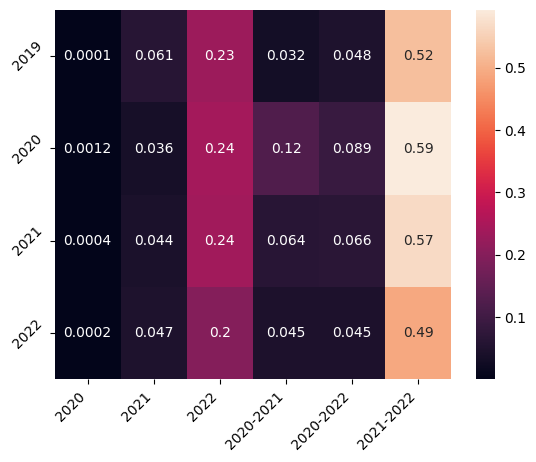

In [102]:
g = sns.heatmap(pvalue_faskes_vs_avg_growth_new_deaths, annot=True)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

===========================================================

Scatter Plot

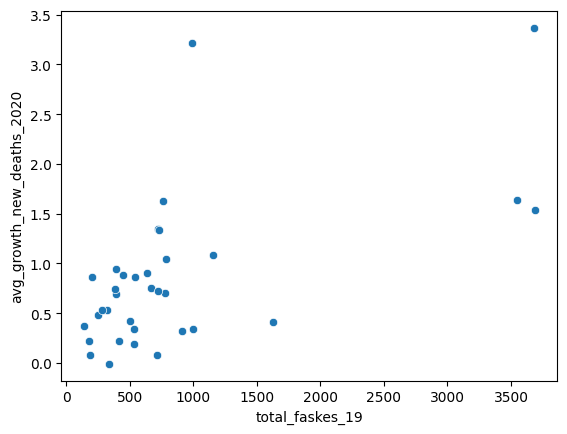

In [103]:
sns.scatterplot(x="total_faskes_19", y="avg_growth_new_deaths_2020", data=df_death_faskes);


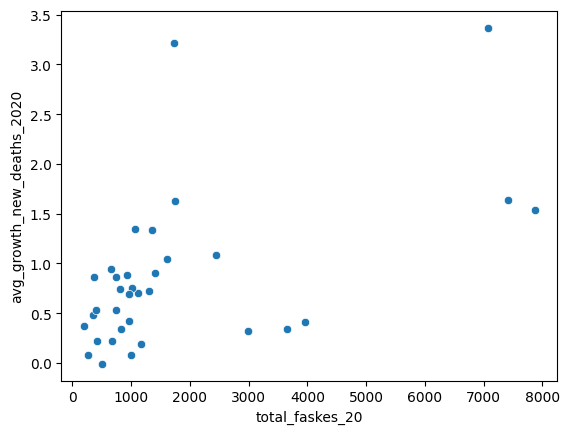

In [104]:
sns.scatterplot(x="total_faskes_20", y="avg_growth_new_deaths_2020", data=df_death_faskes);


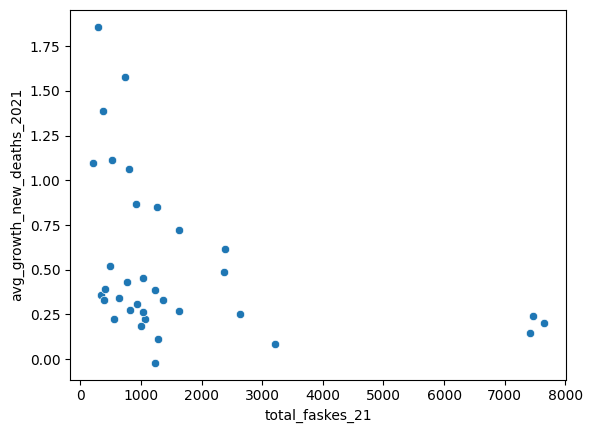

In [105]:
sns.scatterplot(x="total_faskes_21", y="avg_growth_new_deaths_2021", data=df_death_faskes);

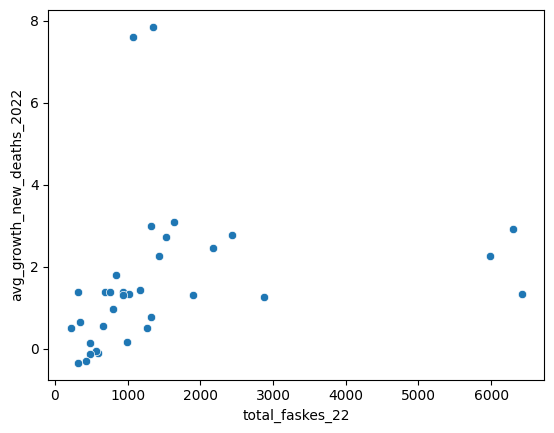

In [106]:
sns.scatterplot(x="total_faskes_22", y="avg_growth_new_deaths_2022", data=df_death_faskes);

In [107]:
df_death_faskes = df_death_faskes.reset_index()
get_head(df_death_faskes, n=35)

Shape : (34, 12)


,province,total_deaths,total_faskes_19,total_faskes_20,total_faskes_21,total_faskes_22,avg_growth_new_deaths_3y,avg_growth_new_deaths_2020,avg_growth_new_deaths_2021,avg_growth_new_deaths_2022,avg_growth_new_deaths_2020_2021,avg_growth_new_deaths_2021_2022
0,Aceh,2223,776,1123,1228,1431,1.033830,0.705198,0.385787,2.263034,0.530974,1.190321
1,Bali,4731,765,1747,1622,1317,1.671211,1.623836,0.724672,2.985901,1.133383,1.693770
2,Banten,2950,913,2996,2370,1905,0.670533,0.317744,0.484847,1.310103,0.408891,0.838528
3,Bengkulu,522,390,662,646,588,0.409066,0.940238,0.341508,-0.091049,0.613658,0.156126
4,DKI Jakarta,15513,995,3648,3219,2436,0.945270,0.337273,0.086220,2.766224,0.200335,1.234793
5,Daerah Istimewa Yogyakarta,5928,534,1161,1072,839,0.673124,0.193345,0.225665,1.802824,0.210974,0.901590
6,Gorontalo,487,206,365,341,312,0.817675,0.858504,0.357825,1.389978,0.572402,0.800176
7,Jambi,889,446,922,828,943,0.792135,0.880128,0.277292,1.380820,0.551309,0.750233
8,Jawa Barat,15937,3683,7073,7412,6421,1.531722,3.366611,0.148305,1.337512,1.611171,0.657965
9,Jawa Tengah,33489,3688,7874,7463,6297,1.440736,1.535703,0.243521,2.931505,0.830876,1.395514


In [108]:
df_death_faskes.to_csv('faskes_all.csv', index=False)

In [109]:
# Unpivoting 
temp_corr = df_death_faskes.melt(id_vars='province',value_vars = ['total_deaths', 'total_faskes_22'], var_name='Cases:', value_name='Count') 

# Visualization
fig = px.line(temp_corr, x='province', y='Count', color='Cases:', template='ggplot2') 
fig.update_layout(title="Correlation")
fig.show()

In [110]:
# Unpivoting 
temp_corr = df_death_faskes.melt(id_vars='province',value_vars = ['total_deaths', 'total_faskes_22','total_faskes_19'], var_name='Cases:', value_name='Count') 

# Visualization
fig = px.line(temp_corr, x='province', y='Count', color='Cases:', template='ggplot2') 
fig.update_layout(title="Correlation")
fig.show()

### **Conclusion:**

<p> ... </p>